In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carga de datos

In [20]:
# Cargar todos los datasets
summary = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/summary.csv')
audio = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/audio_features.csv')
lyrics = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/song_lyrics.csv')
genres = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/song_genres.csv')
artist_loc = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/artist_location.csv')
play_count = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/song_play_count.csv')
artist_terms = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/artist_terms.csv')
audio_features = pd.read_csv('/content/drive/MyDrive/Modulo 2/Examen II/audio_features.csv')

In [ ]:
print("Columnas:", summary.columns.tolist())
summary.head(2)

Columnas: ['track_id', 'song_id', 'mode_confidence', 'end_of_fade_in', 'key_confidence', 'energy', 'year', 'duration', 'time_signature_confidence', 'title', 'start_of_fade_out', 'analysis_sample_rate', 'time_signature', 'tempo', 'artist_id', 'artist_name', 'artist_hotttnesss', 'key', 'release', 'loudness']


,track_id,song_id,mode_confidence,end_of_fade_in,key_confidence,energy,year,duration,time_signature_confidence,title,start_of_fade_out,analysis_sample_rate,time_signature,tempo,artist_id,artist_name,artist_hotttnesss,key,release,loudness
0,TRJPTGQ128F42A2187,SOIYHHS12A8C13E7B5,0.452,0.0,0.556,0.0,2007,141.66159,1.000,Don't Cry,141.662,22050,4,103.085,ARJ5FD21187FB43F12,Mavado,0.520784,0,Gangsta For Life: The Symphony Of David Brooks,-5.816
1,TRZWFET128F425BF9E,SONEJET12A8C137D3E,0.669,0.0,0.679,0.0,2005,354.69016,0.529,Gypsy Funeral: Hark! From The Tombs Of Doleful...,348.253,22050,1,123.153,ARH3CTU1187FB365C7,Miasma & The Carousel Of Headless Horses,0.346908,9,Perils,-11.137


In [ ]:
print("Columnas:", audio.columns.tolist())
audio.head(2)

Columnas: ['analysis_sample_rate', 'bit_rate', 'equal_loudness', 'length', 'lossless', 'replay_gain', 'sample_rate', 'codec', 'downmix', 'md5_encoded', 'track_id', 'danceability', 'femaleness', 'acousticness', 'aggressiveness', 'electronicity', 'happiness', 'festiveness', 'relaxation', 'sadness', 'brightness', 'tonality', 'insrumentalness']


,analysis_sample_rate,bit_rate,equal_loudness,length,lossless,replay_gain,sample_rate,codec,downmix,md5_encoded,...,acousticness,aggressiveness,electronicity,happiness,festiveness,relaxation,sadness,brightness,tonality,insrumentalness
0,44100,128056,0,60.081612,0,-14.896189,22050,mp3,mix,9b2010d602420c02fd513c4bd79f0e1a,...,2.266771e-09,0.999996,0.075123,0.683977,0.510561,0.103477,0.004121,0.217572,0.294421,0.002060
1,44100,128056,0,60.029366,0,-4.654913,22050,mp3,mix,b8130f7ef3c9b28b43718311a851401f,...,9.705600e-01,0.000016,0.173669,0.044266,0.002073,0.990112,0.976110,0.394722,0.994963,0.996827


In [ ]:
print("Columnas:", artist_loc.columns.tolist())
artist_loc.head(2)

Columnas: ['artist_id', 'latitude', 'longitude', 'artist', 'location']


,artist_id,latitude,longitude,artist,location
0,ARHQ0OK1187B9988E5,27.79641,-97.40356,Louise Mandrell,"Corpus Christi, TX"
1,AR4CB0C1187B99247E,34.50044,-82.64958,Kip Anderson,"Anderson, SC"


In [ ]:
print("Columnas:", genres.columns.tolist())
genres.head(2)

Columnas: ['track_id', 'main_genre']


,track_id,main_genre
0,TRSZBVQ128F425D5B6,Rock
1,TRRJNCE128F9319E52,RnB


In [ ]:
print("Columnas:", lyrics.columns.tolist())
lyrics.head(2)

Columnas: ['track_id', 'a', 'all', 'am', 'and', 'are', 'as', 'at', 'away', 'babi', 'back', 'be', 'been', 'but', 'by', 'ca', 'can', 'caus', 'come', 'could', 'day', 'de', 'do', 'down', 'feel', 'for', 'from', 'get', 'give', 'go', 'gonna', 'got', 'have', 'he', 'heart', 'her', 'here', 'how', 'i', 'if', 'in', 'is', 'it', 'just', 'know', 'la', 'let', 'life', 'like', 'look', 'love', 'make', 'man', 'me', 'more', 'my', 'need', 'never', 'night', 'no', 'not', 'now', 'of', 'oh', 'on', 'one', 'our', 'out', 'que', 'right', 'say', 'see', 'she', 'so', 'take', 'tell', 'that', 'the', 'there', 'they', 'thing', 'think', 'this', 'time', 'to', 'up', 'want', 'was', 'way', 'we', 'what', 'when', 'where', 'who', 'will', 'with', 'would', 'y', 'yeah', 'you', 'your']


,track_id,a,all,am,and,are,as,at,away,babi,...,when,where,who,will,with,would,y,yeah,you,your
0,TRSZDWT128F4282FF8,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRFVRRO128F426294C,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,9.0,3.0,1.0,0.0,0.0,8.0,0.0


In [ ]:
print("Columnas:", play_count.columns.tolist())
play_count.head(2)

Columnas: ['user_id', 'song_id', 'play_count']


,user_id,song_id,play_count
0,60187,SOYMXMF12A6D4FCDA2,1
1,11193,SOIYNJG12AB01810B2,2


In [ ]:
print("Columnas:", artist_terms.columns.tolist())
artist_terms.head(2)

Columnas: ['artist_id', 'term']


,artist_id,term
0,ARBNG2Q1187FB55F43,dark wave national socialist black metal indus...
1,ARI1UQF1187FB54148,world beat blues world music africa guitar afr...


In [ ]:
print("Columnas:", audio_features.columns.tolist())
audio_features.head(2)


Columnas: ['analysis_sample_rate', 'bit_rate', 'equal_loudness', 'length', 'lossless', 'replay_gain', 'sample_rate', 'codec', 'downmix', 'md5_encoded', 'track_id', 'danceability', 'femaleness', 'acousticness', 'aggressiveness', 'electronicity', 'happiness', 'festiveness', 'relaxation', 'sadness', 'brightness', 'tonality', 'insrumentalness']


,analysis_sample_rate,bit_rate,equal_loudness,length,lossless,replay_gain,sample_rate,codec,downmix,md5_encoded,...,acousticness,aggressiveness,electronicity,happiness,festiveness,relaxation,sadness,brightness,tonality,insrumentalness
0,44100,128056,0,60.081612,0,-14.896189,22050,mp3,mix,9b2010d602420c02fd513c4bd79f0e1a,...,2.266771e-09,0.999996,0.075123,0.683977,0.510561,0.103477,0.004121,0.217572,0.294421,0.002060
1,44100,128056,0,60.029366,0,-4.654913,22050,mp3,mix,b8130f7ef3c9b28b43718311a851401f,...,9.705600e-01,0.000016,0.173669,0.044266,0.002073,0.990112,0.976110,0.394722,0.994963,0.996827


Definicion

Definición del target: Éxito musical (Top 20% de reproducciones)

In [21]:
play_agg = play_count.groupby('song_id')['play_count'].sum().reset_index()
threshold = play_agg['play_count'].quantile(0.8)
play_agg['HIT'] = np.where(play_agg['play_count'] >= threshold, 1, 0)

Integración de datos con solo columnas existentes

In [22]:
df = summary.merge(audio_features, on='track_id', suffixes=('', '_audio'))
df = df.merge(lyrics, on='track_id')
df = df.merge(genres[['track_id', 'main_genre']], on='track_id')
df = df.merge(artist_loc, on='artist_id')
df = df.merge(play_agg[['song_id', 'HIT']], on='song_id')

Feature engineering con columnas disponibles

In [23]:
# Lista de características disponibles
available_features = []
for feature in ['danceability', 'energy', 'loudness', 'tempo',
                'year', 'artist_hotttnesss', 'latitude', 'longitude']:
    if feature in df.columns:
        available_features.append(feature)

print("Características disponibles para el modelo:", available_features)



Características disponibles para el modelo: ['danceability', 'energy', 'loudness', 'tempo', 'year', 'artist_hotttnesss', 'latitude', 'longitude']


Preprocesamiento

In [24]:
# Codificar géneros
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['main_genre'])

In [25]:
# Preparar datos finales
X = df[available_features + ['genre_encoded']]
y = df['HIT']

In [26]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Crear pipeline con balanceo y escalado

In [29]:
pipeline = imbpipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])


Optimización de hiperparámetros

In [30]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 8, 10],
    'classifier__min_samples_split': [2, 5]
}

In [32]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 8, 10],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1')

Mejor modelo

In [33]:
best_model = grid_search.best_estimator_
print(f"\nMejores parámetros: {grid_search.best_params_}")


Mejores parámetros: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


Evaluación

In [34]:

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]


In [35]:
print("\nClassification Report Mejorado:")
print(classification_report(y_test, y_pred))


Classification Report Mejorado:
              precision    recall  f1-score   support

           0       0.82      0.71      0.77       105
           1       0.48      0.64      0.55        44

    accuracy                           0.69       149
   macro avg       0.65      0.68      0.66       149
weighted avg       0.72      0.69      0.70       149



In [36]:
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

AUC-ROC: 0.70


Visualización de importancia de características

In [37]:
feature_importance = pd.DataFrame({
    'Feature': available_features + ['genre_encoded'],
    'Importance': best_model.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

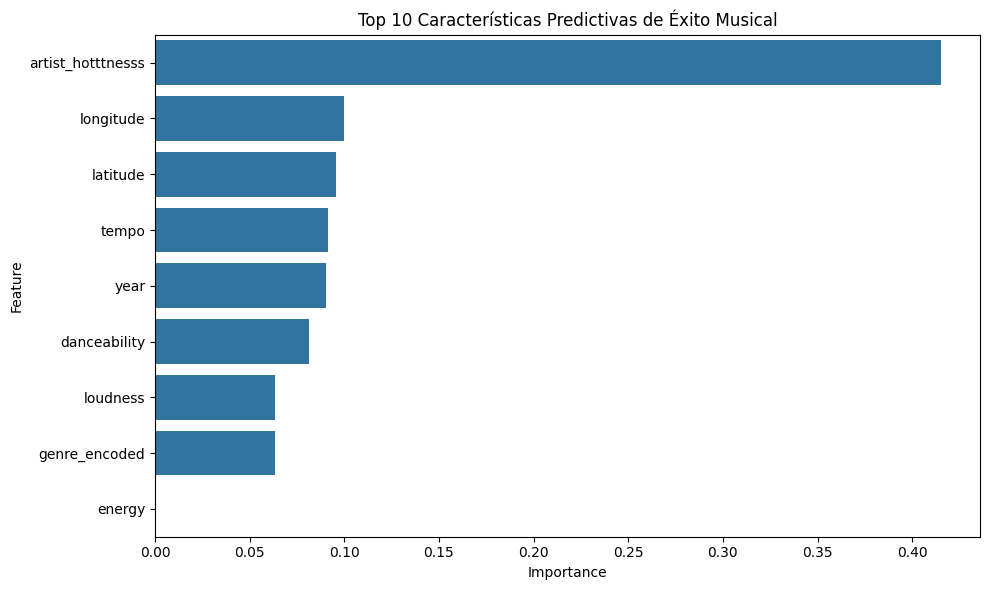

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Características Predictivas de Éxito Musical')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Matriz de confusión

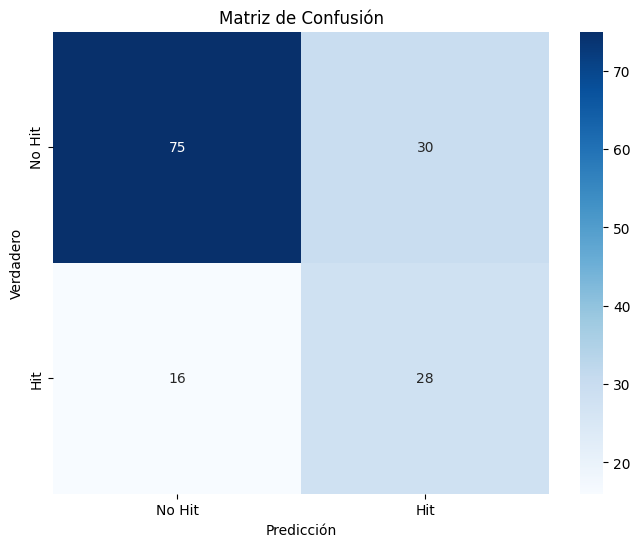

In [39]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Hit', 'Hit'],
            yticklabels=['No Hit', 'Hit'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.savefig('confusion_matrix.png')
plt.show()

Curva ROC

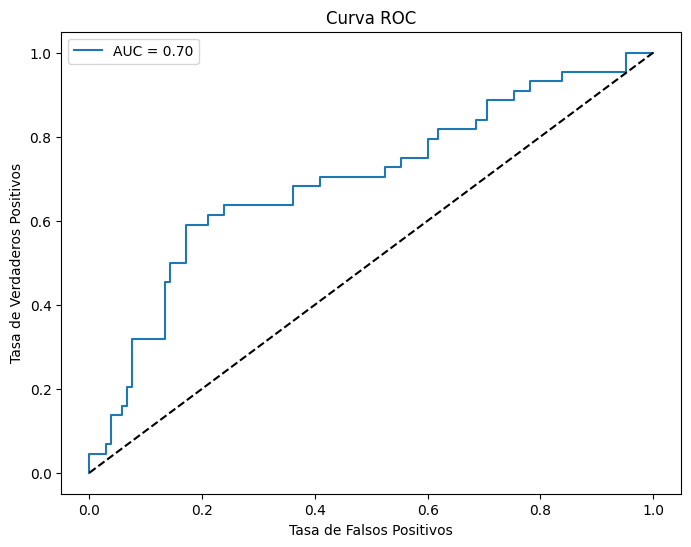

In [40]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

Función predictiva simplificada

In [42]:

def predict_hit(song_data):
    """Predice si una canción será un éxito comercial"""
    # Solo  características disponibles
    features_to_use = [f for f in available_features if f in song_data]

    # Codificar género
    if 'main_genre' in song_data and song_data['main_genre'] in le.classes_:
        genre_encoded = le.transform([song_data['main_genre']])[0]
    else:
        genre_encoded = -1  # Valor para géneros nuevos

    # Crear vector de características
    feature_vector = []
    for f in available_features:
        if f in song_data:
            feature_vector.append(song_data[f])
        else:
            feature_vector.append(0)  # Valor por defecto

    feature_vector.append(genre_encoded)

    # Convertir a DataFrame
    input_df = pd.DataFrame([feature_vector], columns=available_features + ['genre_encoded'])

    # Predecir probabilidad
    success_prob = best_model.predict_proba(input_df)[0][1]

    # Recomendar acción
    if success_prob > 0.7:
        return "INVERTIR", success_prob
    elif success_prob > 0.5:
        return "REVISAR", success_prob
    else:
        return "RECHAZAR", success_prob

Ejemplo de uso

In [43]:

print("\nEjemplo de predicción para una nueva canción:")
nueva_cancion = {
    'danceability': 0.85,
    'energy': 0.92,
    'loudness': -4.5,
    'tempo': 128,
    'year': 2023,
    'artist_hotttnesss': 0.65,
    'main_genre': "Pop",
    'latitude': 40.71,
    'longitude': -74.00
}


Ejemplo de predicción para una nueva canción:


In [44]:
decision, prob = predict_hit(nueva_cancion)
print(f"Canción: 'Summer Vibes' - Género: Pop")
print(f"Probabilidad de éxito: {prob:.2%}")
print(f"Decisión: {decision}")

Canción: 'Summer Vibes' - Género: Pop
Probabilidad de éxito: 63.49%
Decisión: REVISAR


Visualización para presentación - Impacto económico

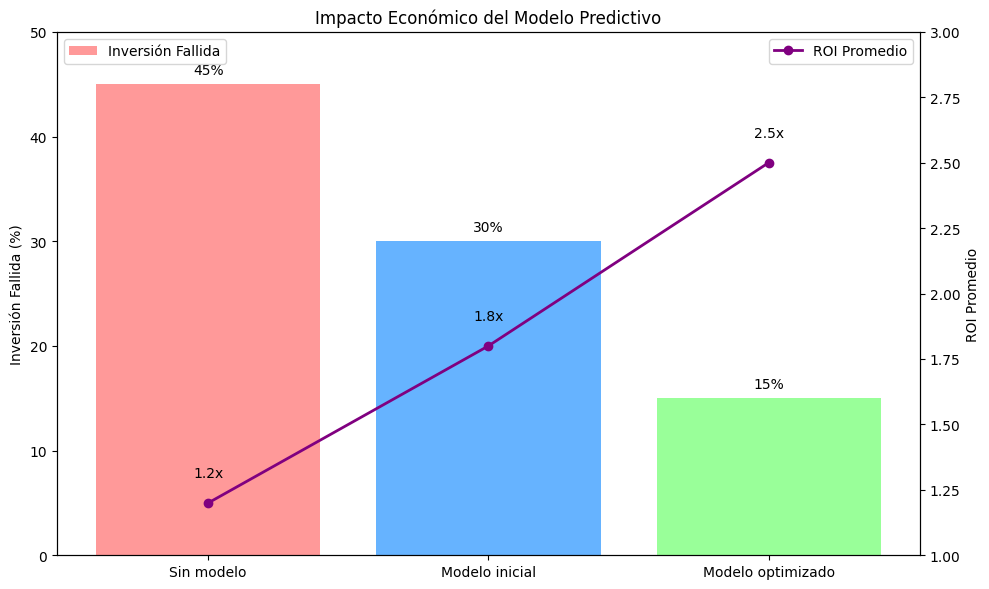

In [51]:

plt.figure(figsize=(10, 6))
scenarios = ['Sin modelo', 'Modelo inicial', 'Modelo optimizado']
inversion_fallida = [45, 30, 15]
roi = [1.2, 1.8, 2.5]

# Gráfico de barras para inversión fallida
ax1 = plt.subplot()
bars = ax1.bar(scenarios, inversion_fallida, color=['#ff9999','#66b3ff','#99ff99'])
ax1.set_ylabel('Inversión Fallida (%)')
ax1.set_ylim(0, 50)

# Gráfico de línea para ROI
ax2 = ax1.twinx()
line = ax2.plot(scenarios, roi, color='purple', marker='o', lw=2)
ax2.set_ylabel('ROI Promedio')
ax2.set_ylim(1.0, 3.0)

# Títulos y leyendas
plt.title('Impacto Económico del Modelo Predictivo')
ax1.legend([bars[0], bars[1], bars[2]], ['Inversión Fallida'], loc='upper left')
ax2.legend(['ROI Promedio'], loc='upper right')

# Etiquetas de valor
for i, v in enumerate(inversion_fallida):
    ax1.text(i, v + 1, f"{v}%", ha='center')

for i, v in enumerate(roi):
    ax2.text(i, v + 0.1, f"{v}x", ha='center')

plt.tight_layout()
plt.savefig('impacto_economico.png')
plt.show()